In [1]:
# Importing Required libraries
# Data manipulation
import pandas as pd
# Numerical calculation
import numpy as np
# Data preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# Model building
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Computations
import itertools

In [2]:
# Importing data
train = pd.read_csv("C:/Users/sriva/Desktop/Fake news detection/train.csv")
test  = pd.read_csv ("C:/Users/sriva/Desktop/Fake news detection/test.csv")
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
print(f"Train Shape : {train.shape}")
print(f"Test Shape : {test.shape}")

Train Shape : (20800, 5)
Test Shape : (5200, 4)


## Data Analysis ##

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


Above train data infers that we are having missing data in field "title","author" and "text".

In [5]:
# Number of null data point in each field
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
train.dtypes.value_counts()

object    3
int64     2
dtype: int64

## Data preprocessing ##

In [7]:
test=test.fillna(' ')
train=train.fillna(' ')

In [8]:
# Create a column with all the data available
test['total']=test['title']+' '+test['author']+' '+test['text']
train['total']=train['title']+' '+train['author']+' '+train['text']


In [9]:
# Have a glance at our training set
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
 5   total   20800 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [10]:
train['total'].head

<bound method NDFrame.head of 0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799    What Keeps the F-35 Alive David Swanson   Davi...
Name: total, Length: 20800, dtype: object>

In [11]:
# Dividing the training set by using train_test_split
X_train, X_val, y_train, y_val = train_test_split(train['total'], train.label, test_size=0.20, random_state=0)

In [12]:
# Initialize the `count_vectorizer`
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') 
# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)
# Transform the validation set 
count_val = count_vectorizer.transform(X_val)

In [13]:
#Initialize the `tfidf_vectorizer`
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the validation set 
tfidf_val = tfidf_vectorizer.transform(X_val)

In [14]:
# Importing multinomial naive bayes model
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_val)
acc_nb_count = accuracy_score(y_val, pred_nb_count)
print(acc_nb_count)

0.942548076923077


In [15]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, y_train)
    pred_tune = nb_classifier_tune.predict(count_val)
    score = accuracy_score(y_val, pred_tune)
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.00 Score: 0.91106
Alpha: 0.05 Score: 0.94183
Alpha: 0.10 Score: 0.94255
Alpha: 0.15 Score: 0.94279
Alpha: 0.20 Score: 0.94231
Alpha: 0.25 Score: 0.94111
Alpha: 0.30 Score: 0.93990
Alpha: 0.35 Score: 0.93822
Alpha: 0.40 Score: 0.93750
Alpha: 0.45 Score: 0.93630
Alpha: 0.50 Score: 0.93510
Alpha: 0.55 Score: 0.93486
Alpha: 0.60 Score: 0.93341
Alpha: 0.65 Score: 0.93149
Alpha: 0.70 Score: 0.93029
Alpha: 0.75 Score: 0.92909
Alpha: 0.80 Score: 0.92788
Alpha: 0.85 Score: 0.92644
Alpha: 0.90 Score: 0.92428
Alpha: 0.95 Score: 0.92308


In [16]:
# Let's re-run our fine-tuned model and plot the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.15)
nb_classifier.fit(count_train, y_train)
pred_nb_countv = nb_classifier.predict(count_val)
cm1 = confusion_matrix(y_val, pred_nb_countv, labels=[0,1])
accuracy_nb_countv=accuracy_score(pred_nb_countv,y_val)
CR_nb_countv=classification_report(pred_nb_countv,y_val)
accuracy_nb_countv,print(CR_nb_countv)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2254
           1       0.89      0.99      0.94      1906

    accuracy                           0.94      4160
   macro avg       0.94      0.95      0.94      4160
weighted avg       0.95      0.94      0.94      4160



(0.9427884615384615, None)

In [17]:
# Confusion matrix plot
def plot_confusion_matrix(cm,accuracy_model):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm,annot=True,fmt='0.2f',linewidths=0.5,square=True,cmap='coolwarm')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    A=f'Accuracy Score :{accuracy_model:.2f}'
    plt.title(A)
    plt.show()

## Confusion matrix Multinomial naive bayes classifier for  count vectorizer ##

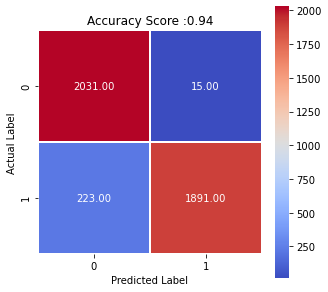

In [18]:
plot_confusion_matrix(cm1,accuracy_nb_countv)

In [19]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_val)
acc_nb_tfidf = accuracy_score(y_val, pred_nb_tfidf)
print(acc_nb_tfidf)

0.926923076923077


In [20]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,0.1,.01):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(tfidf_train, y_train)
    pred_tune = nb_classifier_tune.predict(tfidf_val)
    score = accuracy_score(y_val, pred_tune)
    print("Alpha: {:.2f}  Score: {:.5f}".format(alpha, score))

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.00  Score: 0.90649
Alpha: 0.01  Score: 0.94375
Alpha: 0.02  Score: 0.94375
Alpha: 0.03  Score: 0.94159
Alpha: 0.04  Score: 0.93966
Alpha: 0.05  Score: 0.93822
Alpha: 0.06  Score: 0.93462
Alpha: 0.07  Score: 0.93317
Alpha: 0.08  Score: 0.93005
Alpha: 0.09  Score: 0.92861


In [21]:
# Let's run the optimized model with best value of hyperparameter and check the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.01)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_val)
cm2 = confusion_matrix(y_val, pred_nb_tfidf, labels=[0,1])
accuracy_nb_tfidf=accuracy_score(pred_nb_tfidf,y_val)
CR_nb_tfidf=classification_report(pred_nb_tfidf,y_val)
accuracy_nb_tfidf,print(CR_nb_tfidf)

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      2254
           1       0.90      0.99      0.94      1906

    accuracy                           0.94      4160
   macro avg       0.94      0.95      0.94      4160
weighted avg       0.95      0.94      0.94      4160



(0.94375, None)

## Confusion matrix Multinomial naive bayes classifier for  tfidf vectorizer ##

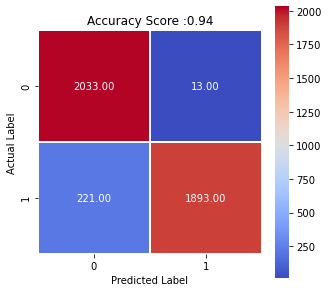

In [22]:
plot_confusion_matrix(cm2,accuracy_nb_tfidf)

## Passive Aggressive Classifier ##

In [23]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(count_train, y_train)
pred_linear_countv = linear_classifier.predict(count_val)
cm3 = confusion_matrix(y_val, pred_linear_countv, labels=[0,1])
accuracy_lc_countv=accuracy_score(pred_linear_countv,y_val)
CR_lc_countv=classification_report(pred_linear_countv,y_val)
accuracy_lc_countv,print(CR_lc_countv)

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2027
           1       0.97      0.96      0.97      2133

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



(0.9665865384615384, None)

## Confuson matrix Passive Aggressive Classifier for count vectrizer ##

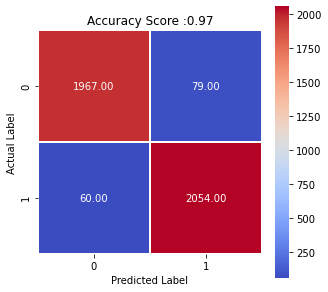

In [24]:
plot_confusion_matrix(cm3,accuracy_lc_countv)

In [25]:
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(tfidf_train, y_train)
pred_linear_tfidf = linear_classifier.predict(tfidf_val)
cm4 = confusion_matrix(y_val, pred_linear_tfidf, labels=[0,1])
accuracy_lc_tfidf=accuracy_score(pred_linear_tfidf,y_val)
CR_lc_tfidf=classification_report(pred_linear_tfidf,y_val)
accuracy_lc_tfidf,print(CR_lc_tfidf)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2080
           1       0.97      0.99      0.98      2080

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



(0.9807692307692307, None)

## Confusion matrix Passive Aggressive Classifier for tfidf vectorizer ##

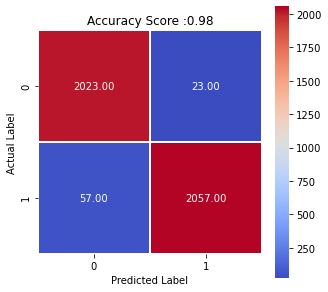

In [26]:
plot_confusion_matrix(cm4,accuracy_lc_tfidf)

In [27]:
logreg = LogisticRegression(C=1e5)
logreg.fit(tfidf_train, y_train)
pred_logreg_tfidf = logreg.predict(tfidf_val)
pred_logreg_tfidf_proba = logreg.predict_proba(tfidf_val)[:,1]
accuracy_logreg_tfidf = accuracy_score(y_val,pred_logreg_tfidf)
CR_logreg_tfidf =classification_report(pred_logreg_tfidf,y_val)
cm5 = confusion_matrix(y_val, pred_logreg_tfidf, labels=[0,1])
accuracy_logreg_tfidf,print(CR_logreg_tfidf)

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2081
           1       0.97      0.99      0.98      2079

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



(0.9800480769230769, None)

## Confusion matrix Logistic Regression for tfidf vaectorizer ##

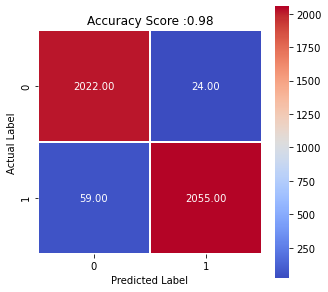

In [28]:
plot_confusion_matrix(cm5,accuracy_logreg_tfidf)

In [29]:
logreg = LogisticRegression(C=1e5)
logreg.fit(count_train, y_train)
pred_logreg_countv = logreg.predict(count_val)
accuracy_logreg_countv = accuracy_score(y_val,pred_logreg_countv)
CR_logreg_countv=classification_report(pred_logreg_countv,y_val)
cm6 = confusion_matrix(y_val, pred_logreg_countv, labels=[0,1])
accuracy_logreg_countv,print(CR_logreg_countv)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2041
           1       0.98      0.98      0.98      2119

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



(0.9776442307692308, None)

## Confusion matrix Logistic Regression for Count vectorizer ##

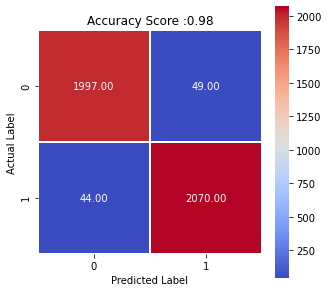

In [30]:
plot_confusion_matrix(cm6,accuracy_logreg_countv)

In [31]:
Accuracy_table=pd.DataFrame({'Model Name':['Countvectorizer Multinomial naive bayes','Tfidf Multinomial naive bayes',
                                           'Countvectorizer Passive Aggressive Classifier','Tfidf Passive Aggressive Classifier',
                                          'Countvectorizer Logistic Regression','Tfidf Logistic Regression'],
                             'Accuracy Score':[accuracy_nb_countv,accuracy_nb_tfidf,accuracy_lc_countv,accuracy_lc_tfidf,
                                              accuracy_logreg_countv,accuracy_logreg_tfidf]},index=[1,2,3,4,5,6])
Accuracy_table

,Model Name,Accuracy Score
1,Countvectorizer Multinomial naive bayes,0.942788
2,Tfidf Multinomial naive bayes,0.943750
3,Countvectorizer Passive Aggressive Classifier,0.966587
4,Tfidf Passive Aggressive Classifier,0.980769
5,Countvectorizer Logistic Regression,0.977644
6,Tfidf Logistic Regression,0.980048


## Test data analysis ##

In [32]:
test.head()

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5200 non-null   object
 2   author  5200 non-null   object
 3   text    5200 non-null   object
 4   total   5200 non-null   object
dtypes: int64(1), object(4)
memory usage: 203.2+ KB


Test data is balanced as there is no null data present.

In [34]:
tfidf_test=tfidf_vectorizer.transform(test['total'])

In [35]:
count_test = count_vectorizer.transform(test['total'])

In [36]:
pred_logreg_countv_test = logreg.predict(count_test)
pred_logreg_countv_test

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [37]:
results = pd.DataFrame(test['id'], columns=['id'])
results.head()

,id
0,20800
1,20801
2,20802
3,20803
4,20804


In [38]:
results['label'] = pred_logreg_countv_test
results

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1
...,...,...
5195,25995,0
5196,25996,0
5197,25997,0
5198,25998,1


In [39]:
results.to_csv('Results.csv',index=False)